In [51]:
import sys
import os
# Получаем путь к корню проекта (где находится папка src)
project_root = os.path.abspath(os.path.join(".."))  # поднимаемся из notebooks/ в корень
src_path = os.path.join(project_root, "src")

# Добавляем src в sys.path
sys.path.append(src_path)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from model import train_model

In [53]:
import sys
import os

# Получаем путь к корню проекта (где находится папка src)
project_root = os.path.abspath(os.path.join(".."))  # поднимаемся из notebooks/ в корень
src_path = os.path.join(project_root, "src")

# Добавляем src в sys.path
sys.path.append(src_path)

In [54]:
# Визуализация в Jupyter
%matplotlib inline

In [55]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Исследовательский анализ данных (EDA)

In [56]:
# Проверка структуры данных и пропущенных значений:
train.info()
train.isnull().sum()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


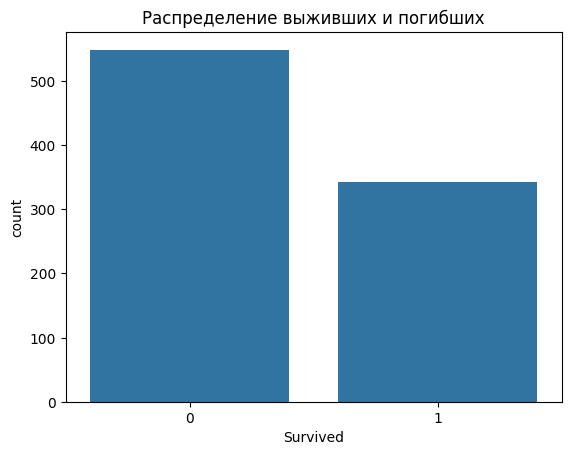

In [57]:
# Анализ целевой переменной:
sns.countplot(x='Survived', data=train)
plt.title("Распределение выживших и погибших")
plt.show()

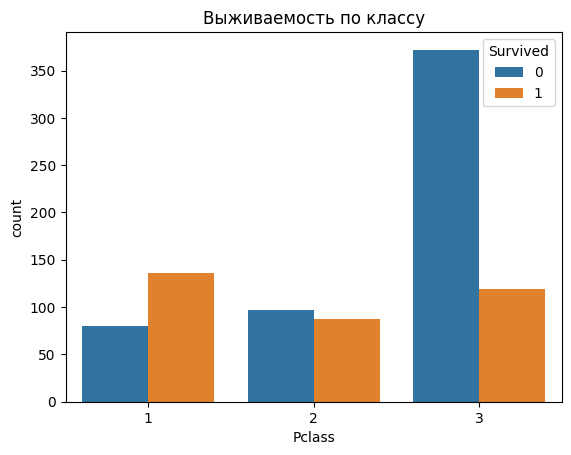

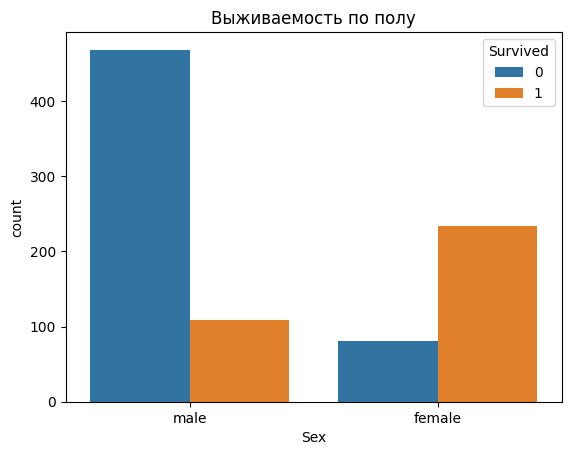

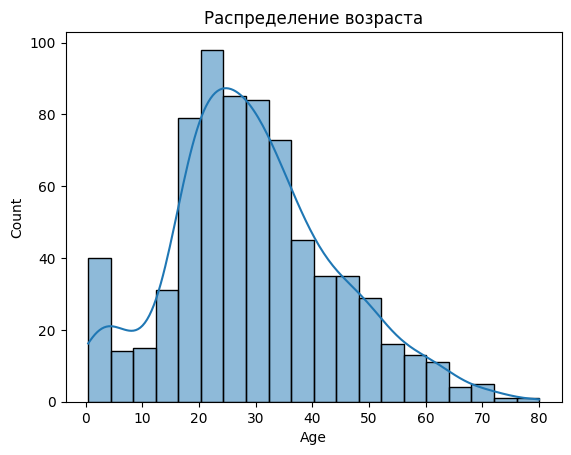

In [58]:
# Визуализация ключевых признаков:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Выживаемость по классу")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Выживаемость по полу")
plt.show()


sns.histplot(train['Age'].dropna(), kde=True)
plt.title("Распределение возраста")
plt.show()

In [ ]:
# Предобработка данных
from data_preprocessing import preprocess_data
from feature_engineering import add_features


train_processed = preprocess_data(train)
train_processed = add_features(train_processed)

test_processed = preprocess_data(test)
test_processed = add_features(test_processed)

train_processed.head()

c:\Users\Zver\Desktop\pet-projects\data_analysis\titanic-survival-prediction\src\data_preprocessing.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
c:\Users\Zver\Desktop\pet-projects\data_analysis\titanic-survival-prediction\src\data_preprocessing.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,IsAlone,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,1,False,False,False,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,1,False,True,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,False,False,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,1,False,True,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,False,False,False,False,False,False,False,True


In [60]:
# Признаки для модели
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
            'Embarked_Q', 'Embarked_S', 'Title', 'FamilySize', 'IsAlone']

x_train = train_processed[features]
y_train = train_processed['Survived']
x_test = test_processed[features]

In [61]:
# Обучение модели
model = train_model(x_train, y_train)


Генерация предсказаний на тестовом наборе

In [62]:
y_pred = model.predict(x_test)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('submission.csv', index=False)
print("Файл submission.csv успешно создан!")

Файл submission.csv успешно создан!


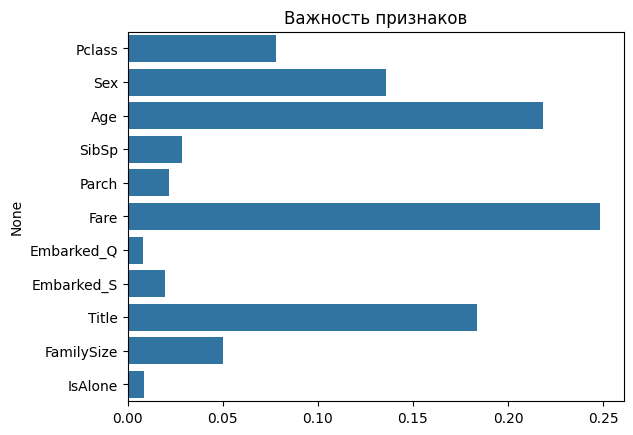

In [63]:
# Важность признаков
importances = model.feature_importances_
feat_names = x_train.columns
sns.barplot(x=importances, y=feat_names)
plt.title("Важность признаков")
plt.show()